# Data Cleaning | Data Analysis | Data Visualization | Feature Engineering | Preprocessing

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/version-2/train (2).csv
/kaggle/input/titanic/titanicdata.csv


In [2]:
#import need libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load datasets on titanic data
data= pd.read_csv('/kaggle/input/titanic/titanicdata.csv')

## Data Analysis 

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#last part
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
#load random data
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
811,812,0,3,"Lester, Mr. James",male,39.0,0,0,A/4 48871,24.1500,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,S
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S


In [7]:
#check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#check data describe without categorical column
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#check missing value
print("Null values per column:")
data.isna().sum()[data.isna().sum() > 0]

Null values per column:


Age         177
Cabin       687
Embarked      2
dtype: int64

In [10]:
#check duplicated value
data.duplicated(subset= ['Name', 'Sex']).sum()

np.int64(0)

## Data Visualization(EDA)

In [11]:
print("Null values per column:")
print(data.isnull().sum())

Null values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Finding Relationships 

#### Survival rate by Sex


> Amora aikane dekthe parchi jee female onk besi survivel korlear karon sombobtho woman ar child besi protocols pabe


Survival rates by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64




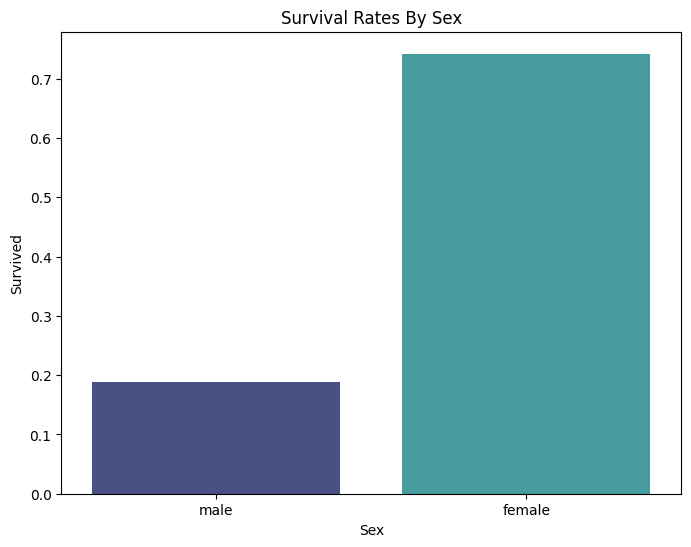

In [12]:
# Calculate survival rates by Sex

Survival_by_Sex= data.groupby('Sex')['Survived'].mean()
print('Survival rates by Sex:')
print(Survival_by_Sex)
print('\n')


#plot survival_by_sex
plt.figure(figsize= (8, 6))
sns.barplot(x= 'Sex', y= 'Survived', data= data, ci= None, palette= 'mako')
plt.title('Survival Rates By Sex')
plt.ylabel('Survived')
plt.show()

**This stark difference highlights gender as a critical factor influencing survival.**

#### Survival Rates by Age Group

Aikane baby and cuto bacchader beche takar har besi cilo karon সম্ভবত লাইফবোট বরাদ্দে অগ্রাধিকারের কারণে।

প্রাপ্তবয়স্ক এবং কিশোর-কিশোরীদের সাধারণত বেঁচে থাকার হার কম ছিল, যা সম্ভাব্যভাবে ঝুঁকিপূর্ণ গোষ্ঠীগুলির অগ্রাধিকার এবং স্থানান্তরের সময় শারীরিক সীমাবদ্ধতার প্রতিফলন ঘটায়।

বয়স্ক যাত্রীদের (> ৬০ বছর) বেঁচে থাকার হার উল্লেখযোগ্যভাবে কম থাকা জরুরি স্থানান্তরের পরিস্থিতিতে বয়স্ক ব্যক্তিদের যে চ্যালেঞ্জগুলির মুখোমুখি হতে হয় তার ইঙ্গিত দেয়।

Survival Retes By AgeGroup
AgeGroup
Baby         0.704545
Child        0.424242
Teenagers    0.403226
Adult        0.355556
oldAdult     0.420495
Old          0.227273
Name: Survived, dtype: float64




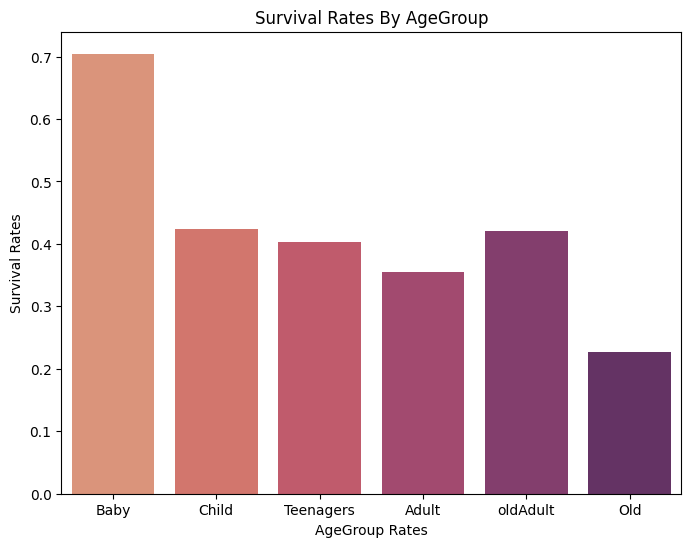

In [13]:
# Calculate Survival Rates by Age
data['AgeGroup']= pd.cut(data['Age'], bins=[0, 5, 14, 18, 30, 60, 100], 
                        labels= ['Baby', 'Child', 'Teenagers', 'Adult', 'oldAdult', 'Old'])

Survival_by_Age= data.groupby('AgeGroup')['Survived'].mean()
print('Survival Retes By AgeGroup')
print(Survival_by_Age)
print('\n')

# plot by survival by age 
plt.figure(figsize= (8,6))
sns.barplot(x= 'AgeGroup', y= 'Survived', data= data, ci= None, 
            order= ['Baby', 'Child', 'Teenagers', 'Adult', 'oldAdult', 'Old'], palette= 'flare')
plt.title('Survival Rates By AgeGroup')
plt.xlabel('AgeGroup Rates')
plt.ylabel('Survival Rates')
plt.show()

#### Survival Rate by Pclass

প্রথম শ্রেণীর যাত্রীদের (৬২.৯৬% বেঁচে থাকার হার) বেঁচে থাকার হার বেশি ছিল, সম্ভবত লাইফবোটের কাছাকাছি থাকার কারণে এবং সরিয়ে নেওয়ার সময় অগ্রাধিকারপ্রাপ্ত প্রবেশাধিকারের কারণে।

তৃতীয় শ্রেণীর যাত্রীদের (২৪.২৪% বেঁচে থাকার হার) সবচেয়ে কম বেঁচে থাকার হারের সম্মুখীন হতে হয়েছিল, সম্ভবত তাদের ডেকের অবস্থান কম থাকার কারণে এবং লাইফবোটে বিলম্বিত প্রবেশাধিকারের কারণে।

যাত্রী শ্রেণী আর্থ-সামাজিক অবস্থার একটি প্রতীক হিসেবে কাজ করে, যা টাইটানিক বিপর্যয়ের সময় সম্পদ এবং সম্পদের অ্যাক্সেসের সাথে যুক্ত বেঁচে থাকার বৈষম্য তুলে ধরে।

Survival Retes By Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64




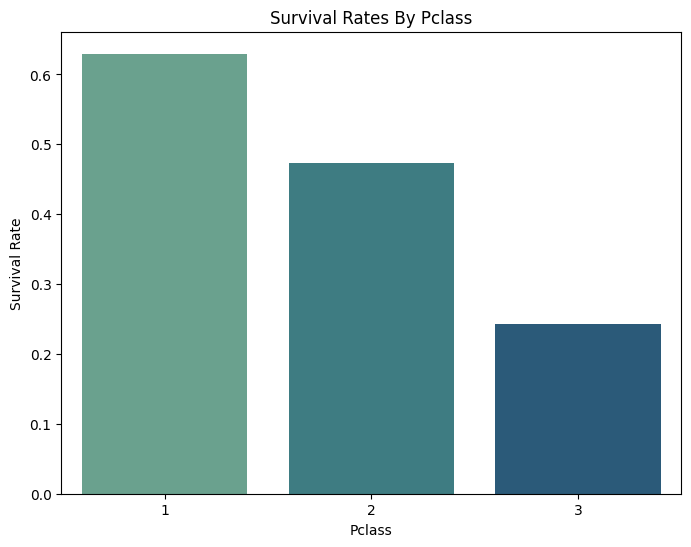

In [14]:
# Calculate the survival rate by Pclass
Survival_by_Pclass= data.groupby('Pclass')['Survived'].mean()
print('Survival Retes By Pclass:')
print(Survival_by_Pclass)
print('\n')

# Plot survival rate by pclass
plt.figure(figsize= (8,6))
sns.barplot(x= 'Pclass', y= 'Survived', data= data, ci= None, palette= 'crest')
plt.title('Survival Rates By Pclass')
plt.ylabel('Survival Rate')
plt.show()

#### Survival Rates by Fare  

যেসব যাত্রী বেশি ভাড়া দিয়েছিলেন (যেমন, খুব বেশি এবং বিলাসবহুল ভাড়া শ্রেণী) তাদের বেঁচে থাকার হার উল্লেখযোগ্যভাবে বেশি ছিল, সম্ভবত তাদের থাকার ব্যবস্থা লাইফবোটের কাছাকাছি এবং অগ্রাধিকার বোর্ডিংয়ের প্রতিফলন ঘটায়।

বিপরীতে, যেসব যাত্রী কম ভাড়া দিয়েছিলেন (যেমন, খুব কম ভাড়ার শ্রেণী) তাদের বেঁচে থাকার হার ছিল 0%, যা কম ভাড়ার শ্রেণীর যাত্রীদের সরিয়ে নেওয়ার সময় যে চ্যালেঞ্জগুলির মুখোমুখি হতে হয়েছিল তা তুলে ধরে।

ভাড়া শ্রেণী জাহাজে যাত্রীদের অবস্থান এবং স্থানান্তরের সম্পদের অ্যাক্সেসের জন্য একটি প্রক্সি হিসেবে কাজ করে, যা বেঁচে থাকার ফলাফলের উপর এর প্রভাব চিত্রিত করে।

Survival Rates By FareClass
FareClass
VeryLow     0.000000
Low         0.206897
Moderate    0.424581
Medium      0.416667
High        0.654206
VeryHigh    0.727273
Luxury      0.777778
Name: Survived, dtype: float64




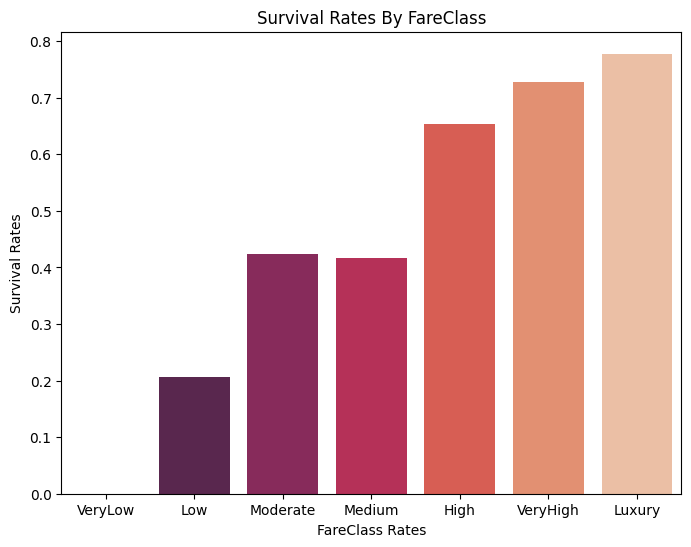

In [15]:
# Calculate Survival by fare class

bins = [0, 5, 10, 20, 50, 100, 250, float('inf')]
labels = ['VeryLow', 'Low', 'Moderate', 'Medium', 'High', 'VeryHigh', 'Luxury']

data['FareClass']= pd.cut(data['Fare'], bins= bins, labels= labels)

Survival_by_FareClass= data.groupby('FareClass')['Survived'].mean()
print('Survival Rates By FareClass')
print(Survival_by_FareClass)
print('\n')

# plot calculate survival by fare class

plt.figure(figsize= (8,6))
sns.barplot(x= 'FareClass', y= 'Survived', data= data, ci= None, palette= 'rocket')
plt.title('Survival Rates By FareClass')
plt.xlabel('FareClass Rates')
plt.ylabel('Survival Rates')
plt.show()

In [16]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,oldAdult,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,oldAdult,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,oldAdult,Low


## Feature Engineering & Preprocessing 

In [18]:
#Preprocessing

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


def prepro(df):
    #two columns sum and create one column Family
    data['Family']= data['SibSp'] + data['Parch']
    
    # Extract titles from names
    df['Title']= df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title']= df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 
                                           'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
    
    # Fill missing embarked with the most frequent value
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    
    # Fill missing fare with the median
    df['Fare']= df['Fare'].fillna(df['Fare'].median(), inplace= True)
    
    #bins = [0, 5, 10, 20, 50, 100, 250, float('inf')]
    #labels = ['VeryLow', 'Low', 'Moderate', 'Medium', 'High', 'VeryHigh', 'Luxury']
    
    # Create fare classes
    df['VeryLow']= (df['Fare'] <= 4)
    df['Low']= (df['Fare'] > 5) & (df['Fare'] <=10)
    df['Moderate']= (df['Fare'] >10) & (df['Fare'] <= 19)
    df['Medium']= (df['Fare'] > 20) & (df['Fare'] <= 50)
    df['High']= (df['Fare'] > 50) & (df['Fare'] <= 100)
    df['VeryHigh']= (df['Fare'] > 100) & (df['Fare'] <= 250)
    df['Luxury']= (df['Fare'] > 250)

    # Convert cabin to first letter and fill missing values with 'N'
    df['Cabin'] = df['Cabin'].fillna('N').map(lambda x: x[0])
    
    # One-hot encoding
    df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title', 'Cabin'], drop_first=True)
    
    #in case there is a cabin that was not mentioned, create it and fill it with False
    for l in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']:
        col = f'Cabin_{l}'
        if col not in df.columns:
            df[col] = pd.Series([False]*df.shape[0])
            df[col].fillna(False, inplace=True)
    
    # Select relevant columns
    cols = ['Age', 'Fare', 'Family', 'Parch', 'SibSp', 'Alone', 'Pclass', 'Very Low', 'Low', 'Moderate', 'Medium',
        'High', 'Very High', 'Luxury', 'Baby', 'Child', 'Teenager',
        'Adult', 'OldAdult', 'Old', 'Sex_male',
        'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
        'Title_Rare', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
        'Cabin_G', 'Cabin_T']
    
    df2 = df[cols].copy()
    
    # Scale numeric features
    numeric_features = ['Age', 'Fare', 'Parch', 'SibSp']
    scaler = StandardScaler()
    df2[numeric_features] = scaler.fit_transform(df2[numeric_features])


    return df2

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

#load the data again
train = pd.read_csv('/kaggle/input/version-2/train (2).csv')

# Perform data preprocessing and feature engineering (assuming you've already done this)
train_processed = prepro(train)

# Define features and target variable
X = train_processed
y = train['Survived']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Dictionary to store results
results = {'Classifier': [], 'Test Accuracy': []}

# Iterate over classifiers
for clf_name, clf in classifiers.items():
    # Fit the model
    clf.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results['Classifier'].append(clf_name)
    results['Test Accuracy'].append(accuracy)


# Create DataFrame from results
results_df = pd.DataFrame(results)

# Display the results
results_df

KeyError: "['Family', 'Alone', 'Very Low', 'Very High', 'Baby', 'Child', 'Teenager', 'Adult', 'OldAdult', 'Old'] not in index"